In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Set your image directories
REAL_IMAGES_DIR = '/content/gdrive/MyDrive/training_real'
FAKE_IMAGES_DIR = '/content/gdrive/MyDrive/training_fake'

def preprocess_image(img_path):
    # Load and preprocess the image using TensorFlow functions
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = preprocess_input(img)
    return img

def preprocess_dataset(image_directory, label):
    preprocessed_images = []
    labels = []

    for filename in os.listdir(image_directory):
        img_path = os.path.join(image_directory, filename)
        if os.path.isfile(img_path):
            preprocessed_img = preprocess_image(img_path)
            preprocessed_images.append(preprocessed_img)
            labels.append(label)

    if len(preprocessed_images) == 0:
        return None, None

    return np.array(preprocessed_images), np.array(labels)

def load_and_preprocess_data():
    real_images, real_labels = preprocess_dataset(REAL_IMAGES_DIR, label=0)
    fake_images, fake_labels = preprocess_dataset(FAKE_IMAGES_DIR, label=1)

    if real_images is None or fake_images is None:
        print("No valid images found in one or both datasets.")
        return None, None

    all_images = np.vstack((real_images, fake_images))
    all_labels = np.concatenate((real_labels, fake_labels))

    random_indices = np.random.permutation(all_images.shape[0])
    all_images = all_images[random_indices]
    all_labels = all_labels[random_indices]

    return all_images, all_labels

if __name__ == "__main__":
    all_images, all_labels = load_and_preprocess_data()

    if all_images is not None:
        print("Data preprocessing successful.")
        # You can use 'all_images' and 'all_labels' for your further processing.


Data preprocessing successful.


In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model




In [5]:
def display_samples(images, labels, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(images[i])
        axes[i].set_title("Label: {}".format(labels[i]))
        axes[i].axis('off')
    plt.show()

Shape of images: (2041, 224, 224, 3)
Shape of labels: (2041,)
Unique labels: [0 1]


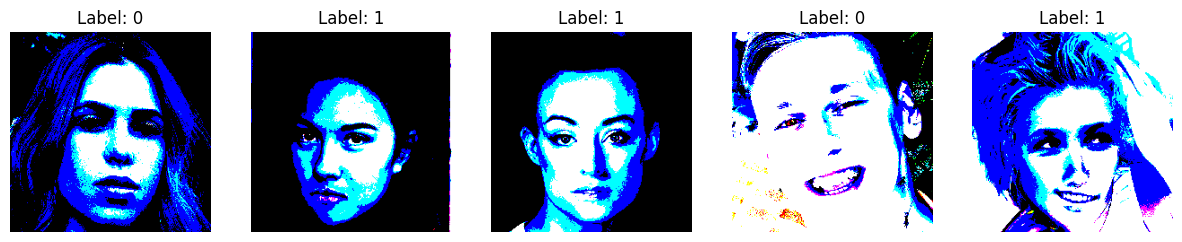

Real image count: 1081
Fake image count: 960


In [6]:
if all_images is not None:
    print("Shape of images:", all_images.shape)
    print("Shape of labels:", all_labels.shape)
    print("Unique labels:", np.unique(all_labels))

    sample_indices = np.random.randint(0, all_images.shape[0], 5)
    display_samples(all_images[sample_indices], all_labels[sample_indices])

    real_count = np.sum(all_labels == 0)
    fake_count = np.sum(all_labels == 1)
    print("Real image count:", real_count)
    print("Fake image count:", fake_count)


In [7]:
if all_images is not None:
    input_shape = all_images[0].shape  # Get the input shape from one of the images
    model = create_model(input_shape)

    # Split the data into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
45/45 [==============================] - 129s 3s/step - loss: 77.1167 - accuracy: 0.5098 - val_loss: 0.7674 - val_accuracy: 0.4837
Epoch 2/10
45/45 [==============================] - 122s 3s/step - loss: 0.5819 - accuracy: 0.7206 - val_loss: 0.7492 - val_accuracy: 0.5359
Epoch 3/10
45/45 [==============================] - 124s 3s/step - loss: 0.3981 - accuracy: 0.8249 - val_loss: 0.8916 - val_accuracy: 0.5719
Epoch 4/10
45/45 [==============================] - 137s 3s/step - loss: 0.1578 - accuracy: 0.9482 - val_loss: 0.9902 - val_accuracy: 0.5654
Epoch 5/10
45/45 [==============================] - 127s 3s/step - loss: 0.0379 - accuracy: 0.9951 - val_loss: 1.3107 - val_accuracy: 0.5948
Epoch 6/10
45/45 [==============================] - 125s 3s/step - loss: 0.0108 - accuracy: 0.9986 - val_loss: 1.6818 - val_accuracy: 0.5686
Epoch 7/10
45/45 [==============================] - 125s 3s/step - loss: 0.0051 - accuracy: 0.9993 - val_loss: 1.8672 - val_accuracy: 0.5882
Epoch 8/10
4

In [8]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [9]:
from tensorflow.keras.models import Sequential
# Create the base model (VGG16) and set layers as non-trainable
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

# Build your custom model on top of the base model
model = Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/5
45/45 [==============================] - 1056s 24s/step - loss: 3.6714 - accuracy: 0.5483 - val_loss: 1.3043 - val_accuracy: 0.5588
Epoch 2/5
45/45 [==============================] - 1052s 23s/step - loss: 0.4347 - accuracy: 0.8186 - val_loss: 1.0232 - val_accuracy: 0.5294
Epoch 3/5
45/45 [==============================] - 1063s 24s/step - loss: 0.2234 - accuracy: 0.9041 - val_loss: 1.2433 - val_accuracy: 0.5817
Epoch 4/5
45/45 [==============================] - 1040s 23s/step - loss: 0.1303 - accuracy: 0.9538 - val_loss: 1.2746 - val_accuracy: 0.5654
Epoch 5/5
45/45 [==============================] - 1052s 23s/step - loss: 0.0834 - accuracy: 0.9797 - val_loss: 1.3308 - val_accuracy: 0.5850


In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

10/10 [==============================] - 194s 19s/step - loss: 1.4365 - accuracy: 0.6059
Test Accuracy: 0.6058632135391235


In [22]:
# Save the trained model to a file
model.save('/content/gdrive/MyDrive/FAKE_image_detection_model.h5')


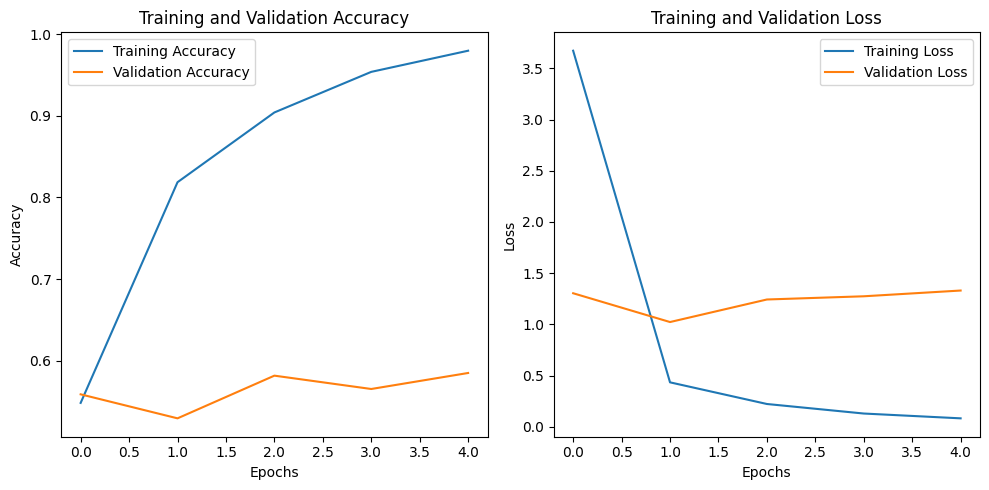

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


In [24]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
saved_model_path = '/content/gdrive/MyDrive/FAKE_image_detection_model.h5'
model = load_model(saved_model_path)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


10/10 [==============================] - 192s 19s/step - loss: 1.4365 - accuracy: 0.6059
Test Loss: 1.4365347623825073
Test Accuracy: 0.6058632135391235


In [25]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

def preprocess_single_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(img_array)
    return preprocessed_img


num_images = int(input("Enter the number of images you want to classify: "))


predicted_classes = []

for i in range(num_images):
    image_path = input(f"Enter the path to image {i+1}: ")
    preprocessed_image = preprocess_single_image(image_path)
    predictions = model.predict(preprocessed_image)
    predicted_class = "fake" if predictions > 0.5 else "real"
    predicted_classes.append(predicted_class)

for i, predicted_class in enumerate(predicted_classes):
    print(f"Image {i+1}: Predicted Class - {predicted_class}")


Enter the number of images you want to classify: 3
Enter the path to image 1: /content/gdrive/MyDrive/1 (162).jpg
1/1 [==============================] - 1s 721ms/step
Enter the path to image 2: /content/gdrive/MyDrive/1 (3).png
1/1 [==============================] - 1s 913ms/step
Enter the path to image 3: /content/gdrive/MyDrive/1 (7).jpg
1/1 [==============================] - 1s 523ms/step
Image 1: Predicted Class - fake
Image 2: Predicted Class - fake
Image 3: Predicted Class - fake
